In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [14]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        self.l = np.cross(self.r,self.m*self.v)
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
        self.L = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.Ep = 0.
        self.VEk = np.zeros(len(t))
        self.VEp = np.zeros(len(t))
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetAngularMomentum(i)
        self.SetPotential(i)
        
        self.a = self.f/self.m
        
        # Euler
        #self.r += self.dt*self.v
        #self.v += self.dt*self.a
        
        #Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            # Falta implementar energía potencial 
            self.Ep += (1/4)*self.K*compresion**4
            
            
    def SetPotential(self,i):
        self.VEp[i] = self.Ep
            
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        
    def SetAngularMomentum(self,i):
        self.L[i] = np.cross(self.r,self.m*self.v)
        
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetAngularMomentum(self,scale=1):
        return self.L[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale]
    
    def GetPotentialEnergy(self,scale=1):
        return self.VEp[::scale]
    
    # Debes agregar las paredes en este punto

In [15]:
def GetParticles(N,t):
    
    Particles = []
    
    for i in range(N):
        r = np.random.uniform(-20,20,size=2)
        v = np.random.uniform(-5,5,size=2)
        a = np.array([0.,0.])
        
        p = Particle(r,v,a,t,m=1,radius=2,Id=i)
        Particles.append(p)
    
    return Particles

In [16]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetParticles(10,t)

In [17]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [18]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|███████████████████████████████████████████████████| 10000/10000 [00:23<00:00, 422.53 Steps/s]


In [19]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

<IPython.core.display.Javascript object>


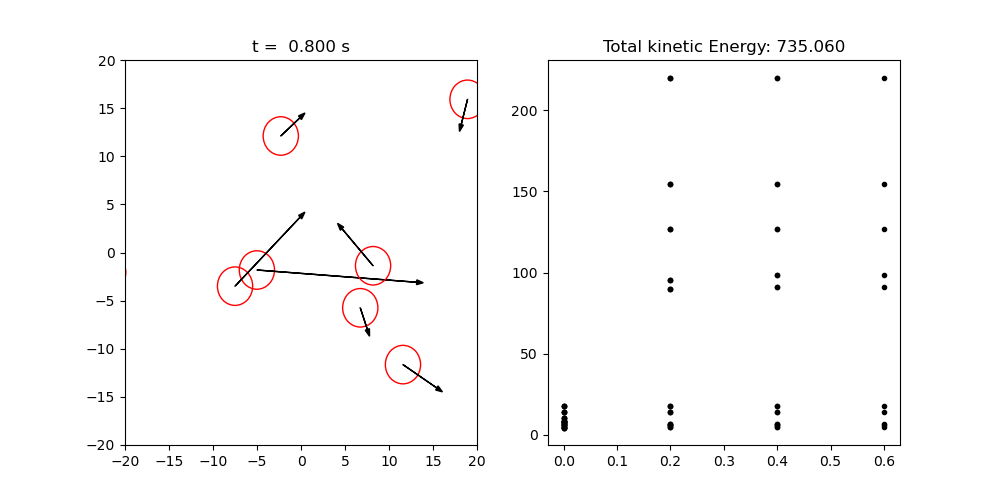

In [20]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

# Desarrollo de la preguntas

$\textbf{a) Grafique el momento lineal total en x $(p_x)$ en función del tiempo. Se debería conservar?}$
$\\$
$\textbf{b) Grafique el momento lineal total en y $(p_y)$ en función del tiempo. Se debería conservar?}$

El momento lineal debería conservarse porque, a priori, no deberían haber fuerzas externas en el sistema, por lo que se cumple que:

$$
\vec{F} = \frac{d\vec{p}}{dt} = 0
\Rightarrow \vec{p} = constante
$$

In [21]:
MomentumT = Particles[0].GetMomentum(scale)

In [22]:
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))

<IPython.core.display.Javascript object>


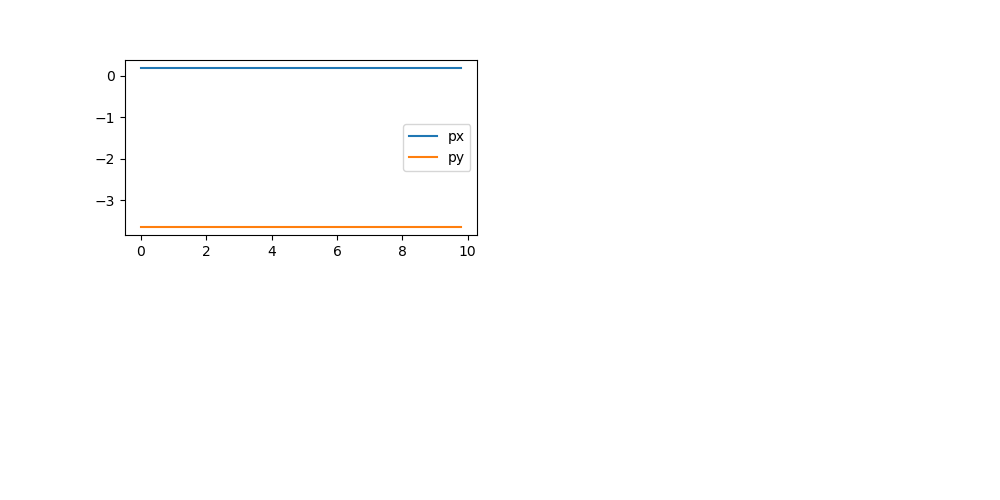

In [23]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(221)
ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax3.legend()

$\textbf{c) Teóricamente muestre que la fuerza de contacto es conservativa. Encuentre la energía potencial.}$

La fuerza de contacto entre dos esferas es:

\begin{equation}
\vec{f}(\vec r_1 ,\vec r_2)=K \big[R1+R2-|\vec r_1- \vec r_2|\big]^3 \hat{n}
\end{equation}

Pasando la fuerza a coordenadas cartesianas en tres dimensiones y poniendo el sistema de referencia en una de las particulas de modo que uno de los vectores sea 0, se tiene que:

\begin{equation}
\vec{f}(x,y) =K \big[R1+R2-\sqrt{x^2+y^2}]^3 \left(\frac{x\vec{i}}{\sqrt{x^2 + y^2}}, \frac{y\vec{j}}{\sqrt{x^2 + y^2}} ,0\right)
\end{equation}

El rotacional de esa fuerza es nulo, así que se podría afirmar que es conservativa.

Sabiendo que es conservativa, la energía potencial se puede hallar sustituyendo $\big[R1+R2-|\vec r_1- \vec r_2|\big]^3$ por $r$ en la ecuación de la fuerza original:

\begin{equation}
    \vec{f}(r)= -K r^3 \hat{n}
\end{equation}

Integrando con respecto a r, sabiendo que $\hat{n}$ va en direccion radial:

\begin{equation}
    \int_{r}^{0} f(r) dr= K \frac{r^4}{4}
\end{equation}

Una funcion $U(r)$ es un potencial de una fuerza conservativa  si:

\begin{equation}
    \vec{F}=-\nabla U=-\frac{\partial U(r)}{\partial r} \hat{r}
\end{equation}

Entonces:

\begin{equation}
    -\frac{\partial K \frac{r^4}{4}}{\partial r} \hat{r}=-K r^3 \hat{n}=\vec{f}
\end{equation}

Por lo que se comprueba nuevamente que $\vec{f}$ es una fuerza conservativa y su potencial es $ K \frac{r^4}{4}$, donde $r$ está definido en el código como la compresión.

$\textbf{d) Grafique la energía cinética total en función del tiempo. Se conserva?}$

La energía cinética se conserva usando el método de Euler-Cromer, siempre y cuando no se generen partículas unas dentro de otras, lo cual causa un aumento de energía al inicio de la simulación proveniente de la energía potencial que otorga la interacción entre partículas. Sin embargo, cabe aclarar que se conserva antes y después del choque, pero no durante el choque porque parte de la energía cinética se convierte en energía potencial debido a la fuerza de contacto.

Adicionalmente, el método de Euler no es suficientemente estable para calcular la energía cinética, por lo que al usar este método se genera energía y el gas se calienta. Esto se soluciona con el otro método, que es más estable en velocidades debido a que este parámetro se actualiza primero.

$\textbf{e) Grafique la energía potencial total en función del tiempo. ¿Qué significa que el potencial sea positivo?}$

El potencial positivo significa un estado no ligado, por lo que la partícula experimenta una fuerza que tiende a scarla de ese estado, haciendo que las particulas se "repelan" cuando colisionan.

$\textbf{f) Grafique la energía mecánica total en función del tiempo. Se conserva? Explique a nivel físico y a nivel del método de Euler}$

La energía mecánica total se conserva signfiicativamente; sin embargo, si se observan sus valores a lo largo del tiempo se puede notar que hay cierta discrepancia en un orden de magnitud de $10^{-1}$ frente a valores de $10^2$ de unidades de energía. A nivel físico, se puede decir que parte de esa energía corresponde a una energía cinética que se tranforma en energía térmica (calor) debido al choque. A nivel del método de Euler, podría ser simplemente que su exactitud en el cálculo de los parámetros (posición y velocidad) de la simulación no sea suficiente para cumplir con discrepancias menos observables.

$\textbf{g) Se cumple el teorema del trabajo y la energía en su simulación? Argumente.}$

El teorema del trabajo y la energía se basa en el siguiente hecho:

\begin{equation}
W = \Delta{K}
\\
W = - \Delta{U}
\end{equation}

Y esto se puede reescribir como:

\begin{equation}
\Delta{K} = - \Delta{U}
\\
E_i = E_f
\end{equation}

Teniendo en cuenta lo respondido en las preguntas anteriores, es posible afirmar que el teorema del trabajo y la energía se cumple en la simulación bajo pequeñas discrepancias en el calculo de la energía mecánica.

$\textbf{h) Calcule y grafique el momento angular en el eje z (Lz). Se conserva?}$

El momento angular efectivamente se conserva y esto puede ser explicado con una justificación similar que con la conservación del momento lineal. Como aparantemente no hay torques externos, entonces el momento angular tiene que ser constante.

$$
\vec{\tau} = \frac{d\vec{L}}{dt} = 0
\Rightarrow \vec{L} = constante
$$



$\textbf{i) Si este sistema que se mueve en 2D se extendiera a 3D, las partículas se mantendrían en el mismo plano de movimiento o se moveran en todo el volumen?}$


Bajo nuestra línea de pensamiento, creemos que si el sistema conserva los parámetros definidos en 2D, se va a seguir moviendo en el mismo plano porque no tiene una tercera componente que permita un movimiento en todo el volumen. Ahora bien, si la fuerza, posición y velocidad tuvieran tres componentes, claramente sería posible que se movieran en 3D.

<IPython.core.display.Javascript object>


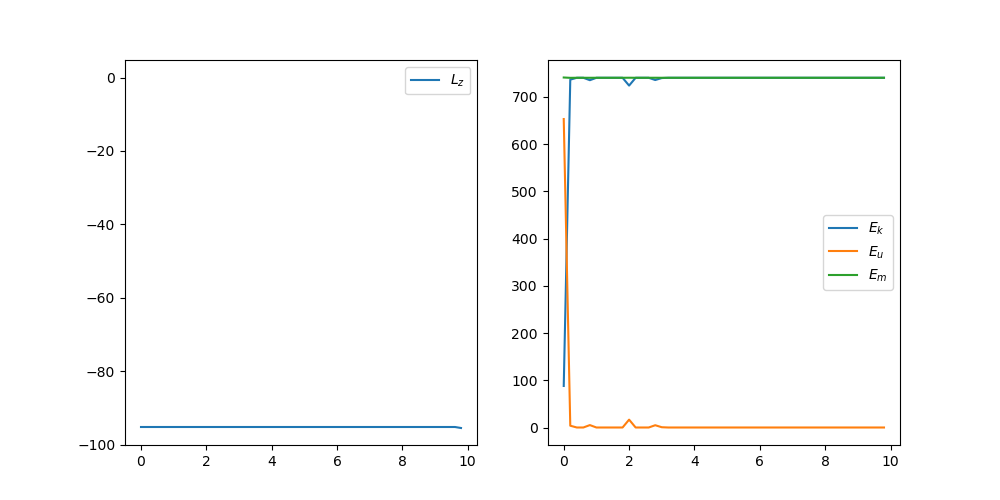

In [32]:
AngularT = Particles[0].GetAngularMomentum(scale)
KineticT = Particles[0].GetKineticEnergy(scale)
PotentialT = Particles[0].GetPotentialEnergy(scale)/2

for i in range(1,len(Particles)):
    AngularT = np.add(AngularT,Particles[i].GetAngularMomentum(scale))
    KineticT = np.add(KineticT,Particles[i].GetKineticEnergy(scale))
    PotentialT = np.add(PotentialT,Particles[i].GetPotentialEnergy(scale)/2)
    
MecanicaT = PotentialT + KineticT
    
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(121)
ax5 = fig4.add_subplot(122)

ax4.plot(t1,AngularT[:,0],label="$L_z$")
ax4.plot(0,0)

ax5.plot(t1,KineticT,label='$E_k$')
ax5.plot(t1,PotentialT,label='$E_u$')
ax5.plot(t1,MecanicaT,label='$E_m$')

ax4.legend()
ax5.legend()